In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
df = pd.concat([training,test])

%matplotlib inline
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

# **1. Exploring Data**

In [3]:
training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


* Name, Sex, Ticket, Pclass, Cabin Survived and Embarked are **Categorical data**
* PassengerId, Age, SibSp, Parch, Fare are **Numerical data**

In [6]:
# Split the imp data to numerical and categorical data 
df_num = training[['Age','SibSp','Parch','Fare']] ## for histogram
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']] # value counts

## 1.1 Working on numerical values

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

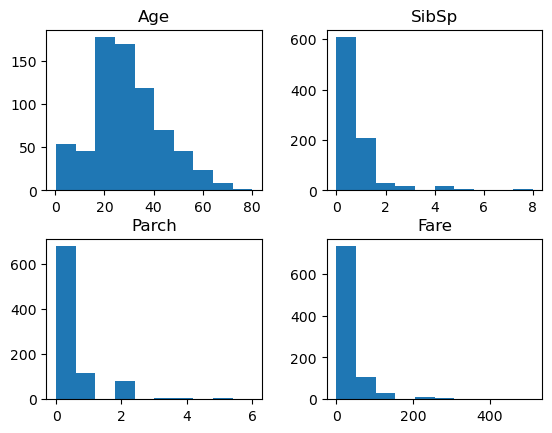

In [7]:
df_num.hist(grid = False)

* The age's plot is considered as **Normal Distribution** so we will not normalize it 
* Fare, Parch, SibSp need to be **normalized**

In [8]:
# We need to find the correlation between the numeric data 
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

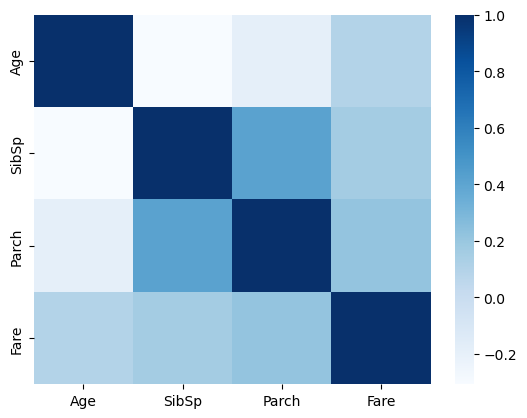

In [9]:
sns.heatmap(df_num.corr(), cmap = "Blues")

In [10]:
# Compare the survival according to the avg of the numerical data 
pd.pivot_table(data = training, index = "Survived", values = df_num)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


**We can get that:**
1. The younger people have the ability to survive than the oldest 
1. The richer ones have survival rate > The poorer ones 
1. If you have siblings then you have less chance of survival.

## 1.2 Work on Categorical values

### Find the relation between the survival rate and categorical values using pivot table

In [11]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


* The most surrvived people are from the 1st and most unsurvived people are from 3rd class

In [12]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


* The females have higher survival rate than males

In [13]:
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


* People who embarked from Southampton have the heigher rate of survival than people who embarked from Cherbourg and Queenstown

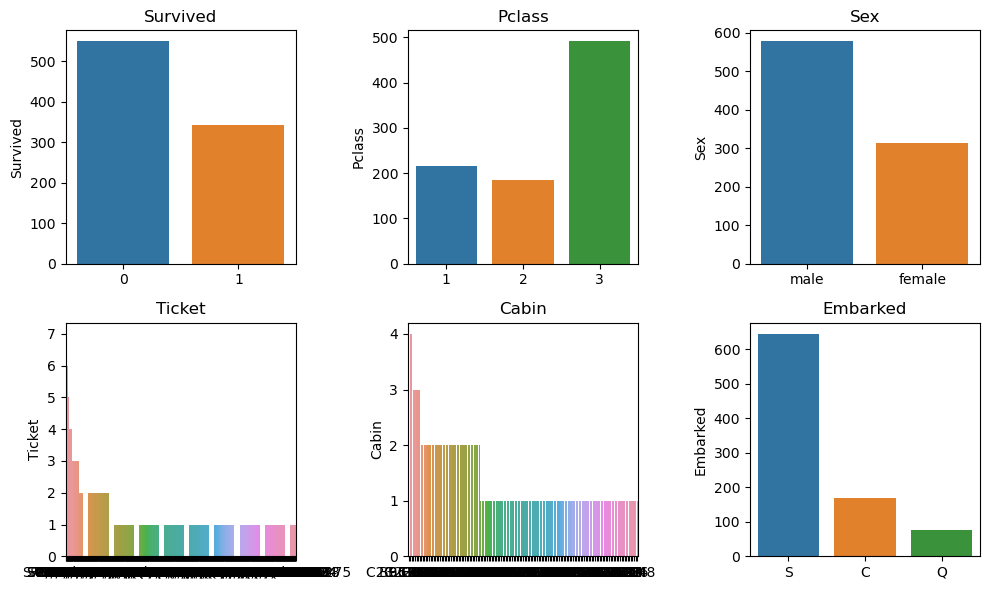

In [14]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 6))

# Loop through each subplot and plot a barplot
for i, ax in enumerate(axes.flatten()):
    sns.barplot(x = df_cat[df_cat.columns[i]].value_counts().index, y = df_cat[df_cat.columns[i]].value_counts(), ax = ax)
    ax.set_title(df_cat.columns[i])

# Display the plot
plt.tight_layout()
plt.show()

* Cabin and ticket graph need some feature engineering

## 1.3 Feature engineering 

### 1st: Cabin

In [15]:
df_cat.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [16]:
training['cabin_multiple'] = df_cat.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [17]:
# 1, 2, 3, 4 are cabin values
# 0 indicates that there is no cabin mentioned 
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [18]:
# compare the 
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [19]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n


In [20]:
training.cabin_adv.value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64

In [21]:
#comparing surivial rate by cabin
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


### 2nd Tickets

In [22]:
training.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [23]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [24]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [25]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(training, index = 'Survived', columns = 'numeric_ticket', values = 'Ticket', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


### 3rd Names

In [26]:
#feature engineering on person's title 
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) #mr., ms., master. etc

In [27]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [28]:
pd.pivot_table(training, index = 'Survived', columns = 'name_title', values = 'Ticket', aggfunc = 'count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# **2. Model Bulding** 

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [30]:
# seting passenger id as an index
df = df.set_index('PassengerId')

In [31]:
# moving the dependent variable (survived) to the end of the columns
col = df.pop('Survived')
df = pd.concat([df, col], axis=1) # if axis=0, hence we concat on rows not columns

### 2.1 Create all categorical variables that we did above for both training and test sets

This step to make sure that the data in training and testing data are all the same

In [32]:
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [33]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [34]:
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [35]:
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [36]:
#Fill the null values with suitable measure of central tendency (mean, mode or median)
df.Age = df.Age.fillna(training.Age.median())

we used median because it's less senstive to outliers

In [37]:
# Drop any row having null values in the specified columns in subset parameter
df = df.dropna(subset=["Embarked"])

<AxesSubplot:>

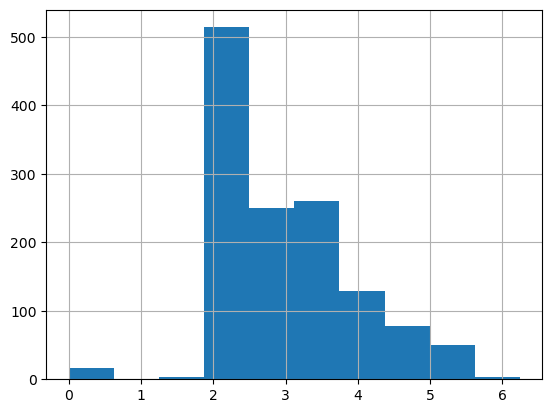

In [38]:
# log normalization of fare
df['norm_fare'] = np.log(df.Fare + 1)
df['norm_fare'].hist()

It become Normal Distribution

In [39]:
# converted fare to category for pd.get_dummies()
df.Pclass = df.Pclass.astype(str)

In [40]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'norm_fare', 'Embarked',
                                       'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title', "train_test"]])

In [41]:
#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = df[df.train_test==1].Survived
y_train.shape

(889,)

In [42]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = df[df.train_test==1].Survived


### 2.2 Applying Cross Validation for the model 

**Cross validation:** is a resampling method that uses different portions of the data to test and train a model on different iterations"

In [43]:
#Naive Bayes for scaled data
gnb = GaussianNB()
cross_val = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [44]:
#Logistic regression for non-scaled data
log_reg = LogisticRegression(max_iter = 2000)
cross_val = cross_val_score(log_reg, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [45]:
#Logistic regression for scaled data 
log_reg = LogisticRegression(max_iter = 2000)
cross_val = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


The logistic regression for scaled and non-scaled data is the same 

In [46]:
#Decision Tree for non-scaled data 
dt = tree.DecisionTreeClassifier(random_state = 1)
cross_val = cross_val_score(dt, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [47]:
#Decision Tree for scaled data 
dt = tree.DecisionTreeClassifier(random_state = 1)
cross_val = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cross_val)
print(cross_val.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


The decision tree for scaled and non scaled data is the same 

In [48]:
# KNN for non-sclaed data
knn = KNeighborsClassifier()
cross_val = cross_val_score(knn, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.76966292 0.80337079 0.80898876 0.82022472 0.85310734]
0.8110709071288008


C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [49]:
# KNN for non-sclaed data
knn = KNeighborsClassifier()
cross_val = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cross_val)
print(cross_val.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin123\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [50]:
# Random forest for non-sclaed data
rf = RandomForestClassifier(random_state = 1)
cross_val = cross_val_score(rf, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [51]:
# Random forest for sclaed data
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


Random forest for scaled and non-scaled data is the same 

In [52]:
# Support vector classifier (SVC) for non-sclaed data
svc = SVC(probability = True)
cross_val = cross_val_score(svc, X_train, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.69101124 0.76966292 0.71348315 0.71910112 0.74011299]
0.7266742842633149


In [53]:
# SVC for sclaed data
svc = SVC(probability = True)
cross_val = cross_val_score(svc, X_train_scaled, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


In [54]:
#! pip install xgboost

In [55]:
# Xtreme Gradient Boosting for trained data 
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cross_val = cross_val_score(xgb, X_train_scaled, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
0.8200152351932963


* Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers.
* A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such


In [56]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('log_reg', log_reg), ('knn',knn), ('rf',rf),
                                            ('gnb', gnb), ('svc', svc), ('xgb', xgb)], voting = 'soft') 

In [57]:
cross_val = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cross_val)
print(cross_val.mean())

[0.8258427  0.81460674 0.8258427  0.79775281 0.84745763]
0.8223005141877738


In [58]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [59]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [60]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled, y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [61]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8290611312131023
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [64]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.8549101758395226
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


In [65]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)